# Web Scrapping using Selenium and BeautifulSoup

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as soup
import requests

def cat_dataframe(category,f):
    category = category.replace(' ','+')
    browser = webdriver.Chrome(executable_path='/Users/rishabh/Downloads/chromedriver')
    url = 'https://www.youtube.com/results?search_query='+category
    browser.get(url)
    time.sleep(1)
    body = browser.find_element_by_tag_name('body')
    for _ in range(900):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)
    html = browser.page_source
    soup1 = soup(html)
    x = 0
    for i in soup1.findAll('a',{'class':'yt-simple-endpoint style-scope ytd-video-renderer'}):
        if(x==1700):
            break
        link = i['href']
        link_url = 'https://www.youtube.com'+link
        r = requests.get(link_url)
        data_link = link.strip('/watch?v=')
        data_title = i['title']
        htmltext = r.text
        soup2 = soup(htmltext)
        if(len(soup2.findAll('p',{'id':'eow-description'}))==0):
            continue
        data_desc = soup2.findAll('p',{'id':'eow-description'})[0].text
        x+=1
        f.write(data_link+','+str(data_title.replace(',','|'))+','+str(data_desc.replace(',','|'))+','+category.replace('+',' ')+'\n')
        
        

def create_df():
    filename = 'youtube_data.csv'
    f = open(filename,'w')
    headers = 'Video id,Title,Description,Category\n'
    f.write(headers)
    categories = ['Science and Technology','Art and Music','Travel Blogs','Manufacturing','History','Food','World War 2','World War 1','Industrial Manufacturing','Lunch','Mobile Phones','DIY','Journey','Breakfast','Trips','Pop Music','dinner','brunch','laptop and computer', 'rock music', 'rap music', 'foreign trips']
    for category in categories:
        cat_dataframe(category,f)
    f.close()

        
create_df()

In [66]:
import pandas as pd
df = pd.read_csv('youtube_data.csv')

In [67]:
df.head()

,Unnamed: 0,Video id,Title,Description,Category
0,0,V2jk8PclZwg,LEVEL 9999 Street Food in Dhaka| Bangladesh - ...,Street Food in Bangladesh is AMAZING! Check ou...,Food
1,1,4v9G2ArswUs,Food in Sri Lanka - 1.5 KG MONSTER Crab Curry ...,Best of Sri Lanka food tour with The Hungry To...,Food
2,2,2ICpGbY5u5o,Ultimate Indian Street Food Breakfast In Kolka...,Veggiepaaji will show you Ultimate Indian Stre...,Food
3,3,_LJ93UoFD6,UNDISCOVERED Madagascar Village Food!!!,🎥STREET FOOD HEAVEN IN MADAGASCAR! » https://y...,Food
4,4,Az3BCtL_KY,EAT IT OR WEAR IT CHALLENGE | Food Eating Chal...,Download Nostra Pro App (A safe| secret app to...,Food


I have used categories like world war 1,2 etc. to find more videos of the category history since after a while scrolling down on youtube gives back no results.

In [68]:
df['Category'].replace(['World War 1','World War 2','Industrial Manufacturing','Lunch','Mobile Phones','DIY','Journey','Breakfast','Trips','Pop Music','laptop and computer','brunch','foreign trips','dinner','rock music','rap music'],['History','History','Manufacturing','Food','Science and Technology','Manufacturing','Travel Blogs','Food','Travel Blogs','Art and Music','Science and Technology','Food','Travel Blogs','Food','Art and Music','Art and Music'],inplace=True)
df['Category'].value_counts()
df.drop_duplicates(inplace=True)
# I'll be using 1500 videos from each category
csv_food = df[df['Category']=='Food'][:1500]
csv_science = df[df['Category']=='Science and Technology'][:1500]
csv_travel = df[df['Category']=='Travel Blogs'][:1500]
csv_art = df[df['Category']=='Art and Music'][:1500]
csv_manufacture = df[df['Category']=='Manufacturing'][:1500]
csv_history = df[df['Category']=='History'][:1500]
df = csv_food.append([csv_science,csv_travel,csv_art,csv_manufacture,csv_history])
df['Category'].value_counts()

Art and Music             1500
Manufacturing             1500
Science and Technology    1500
History                   1500
Food                      1500
Travel Blogs              1500
Name: Category, dtype: int64

In [71]:
#This is the data we will be using !
df = df[df['Description'].notnull()]
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df.to_csv('youtube_data.csv',index=False)

In [72]:
df.head()

,Video id,Title,Description,Category
0,V2jk8PclZwg,LEVEL 9999 Street Food in Dhaka| Bangladesh - ...,Street Food in Bangladesh is AMAZING! Check ou...,Food
1,4v9G2ArswUs,Food in Sri Lanka - 1.5 KG MONSTER Crab Curry ...,Best of Sri Lanka food tour with The Hungry To...,Food
2,2ICpGbY5u5o,Ultimate Indian Street Food Breakfast In Kolka...,Veggiepaaji will show you Ultimate Indian Stre...,Food
3,_LJ93UoFD6,UNDISCOVERED Madagascar Village Food!!!,🎥STREET FOOD HEAVEN IN MADAGASCAR! » https://y...,Food
4,Az3BCtL_KY,EAT IT OR WEAR IT CHALLENGE | Food Eating Chal...,Download Nostra Pro App (A safe| secret app to...,Food


## Cleaning Description

In [1]:
import pandas as pd

In [183]:
df = pd.read_csv('youtube_data.csv')

In [184]:
df.head()

,Video id,Title,Description,Category
0,V2jk8PclZwg,LEVEL 9999 Street Food in Dhaka| Bangladesh - ...,Street Food in Bangladesh is AMAZING! Check ou...,Food
1,4v9G2ArswUs,Food in Sri Lanka - 1.5 KG MONSTER Crab Curry ...,Best of Sri Lanka food tour with The Hungry To...,Food
2,2ICpGbY5u5o,Ultimate Indian Street Food Breakfast In Kolka...,Veggiepaaji will show you Ultimate Indian Stre...,Food
3,_LJ93UoFD6,UNDISCOVERED Madagascar Village Food!!!,🎥STREET FOOD HEAVEN IN MADAGASCAR! » https://y...,Food
4,Az3BCtL_KY,EAT IT OR WEAR IT CHALLENGE | Food Eating Chal...,Download Nostra Pro App (A safe| secret app to...,Food


In [185]:
df.to_csv('youtube_data.csv')

In [16]:
from nltk.corpus import stopwords
import string
pun = list(string.punctuation)
stop = stopwords.words('english')

I am creating punc2 since I want punctuation marks like '@' etc. to be present in my words to help me get rid of links, email-addresses etc.

In [17]:
pun2 = [i for i in pun if i not in ['@','/','-',':']]

In [18]:
df_new = df

### Removing Punctuation

Now one thing that often goes overlooked is the fact that when people type in some description, they may end up putting punctuation marks just after the word or before it or even in it. So this word obviously won't be treated as an english word since 'Hello' is a word but 'Hello!' is not really a word technically speaking. I have tried to fi the same below !

In [19]:
def removepunc(text):
    t = text.split(' ')
    li = []
    for word in t:
        for punc in pun2:
            word = word.replace(punc,'')
        li.append(word)
    return " ".join(li)
df_new['Description'] = df_new['Description'].apply(removepunc)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df_new.head()

,Video id,Title,Description,Category
0,V2jk8PclZwg,LEVEL 9999 Street Food in Dhaka| Bangladesh - ...,Street Food in Bangladesh is AMAZING Check out...,Food
1,4v9G2ArswUs,Food in Sri Lanka - 1.5 KG MONSTER Crab Curry ...,Best of Sri Lanka food tour with The Hungry To...,Food
2,2ICpGbY5u5o,Ultimate Indian Street Food Breakfast In Kolka...,Veggiepaaji will show you Ultimate Indian Stre...,Food
3,_LJ93UoFD6,UNDISCOVERED Madagascar Village Food!!!,🎥STREET FOOD HEAVEN IN MADAGASCAR » https://yo...,Food
4,Az3BCtL_KY,EAT IT OR WEAR IT CHALLENGE | Food Eating Chal...,Download Nostra Pro App A safe secret app to m...,Food


In the function below, I'll be left with only words that only have characters [a-z] in them. This will remove all the words with links, email adresses etc. in them.

In [20]:
def keepstring(text):
    t = text.split(' ')
    li = []
    for word in t:
        if (word.isalpha()):
            li.append(word.lower())
    return " ".join(li)
df_new['Description'] = df_new['Description'].apply(keepstring)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
def removestop(text):
    t = text.split()
    li = [word for word in t if word not in stop]
    return " ".join(li)
df_new['Description'] = df_new['Description'].apply(removestop)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
df_new.head()

,Video id,Title,Description,Category
0,V2jk8PclZwg,LEVEL 9999 Street Food in Dhaka| Bangladesh - ...,street food bangladesh amazing check months fr...,Food
1,4v9G2ArswUs,Food in Sri Lanka - 1.5 KG MONSTER Crab Curry ...,best sri lanka food tour hungry new videos eve...,Food
2,2ICpGbY5u5o,Ultimate Indian Street Food Breakfast In Kolka...,veggiepaaji show ultimate indian street food b...,Food
3,_LJ93UoFD6,UNDISCOVERED Madagascar Village Food!!!,food heaven madagascar tour madagascar best ev...,Food
4,Az3BCtL_KY,EAT IT OR WEAR IT CHALLENGE | Food Eating Chal...,download nostra pro app safe secret app make m...,Food


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df_new.iloc[:,0:3],df_new.iloc[:,3:4],random_state = 0)

In [25]:
x_test.shape

(2161, 3)

Now every description has a variable length, hence I'll be using a vectorizer to transform the sentence into vector having words most used in the dataset which might indicate a good correspondance with the target variable

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

I am going to work with top 10000 words

In [28]:
v = TfidfVectorizer(max_features=10000)

In [29]:
train_features = v.fit_transform(x_train['Description'])

In [30]:
v.get_feature_names()

['aa',
 'aaa',
 'aaawwwartandartistescomfounded',
 'aaj',
 'aakar',
 'aap',
 'aapke',
 'aapko',
 'aaron',
 'aarp',
 'ab',
 'abalone',
 'abandoned',
 'abb',
 'abbey',
 'abc',
 'aber',
 'abhishek',
 'abilities',
 'ability',
 'able',
 'aboard',
 'aboriginal',
 'aboutwe',
 'abraham',
 'abroad',
 'absolute',
 'absolutely',
 'absorbed',
 'abstract',
 'abu',
 'abundant',
 'abuse',
 'ac',
 'academia',
 'academic',
 'academy',
 'accelerate',
 'accelerated',
 'accelerator',
 'accent',
 'accept',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessibility',
 'accessible',
 'accessories',
 'accidentally',
 'acclaimed',
 'accommodate',
 'accommodation',
 'accommodations',
 'accompanied',
 'accompaniment',
 'accompanying',
 'accomplishments',
 'accordance',
 'according',
 'account',
 'accounts',
 'accredited',
 'accuracy',
 'accurate',
 'ace',
 'acer',
 'ache',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acid',
 'acids',
 'acoustic',
 'acquire',
 'acquired',
 'ac

In [31]:
test_features = v.transform(x_test['Description'])

In [32]:
test_features.shape

(2161, 10000)

## Category 1

Logictic Regression, SVM, Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
multinomial = MultinomialNB()
multinomial.fit(train_features, y_train)
multinomial.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7987043035631652

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logistic = LogisticRegression()
logistic.fit(train_features, y_train)
logistic.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8380379453956501

In [85]:
from sklearn import svm

In [86]:
sv = svm.SVC(kernel='rbf')
sv.fit(train_features, y_train)
sv.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.16566404442387783

In [87]:
sv = svm.SVC(kernel='linear')
sv.fit(train_features, y_train)
sv.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8218417399352151

## Category 2

Bagging, Boosting, NN

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=2000,learning_rate=0.1,random_state=0)

In [92]:
ada.fit(train_features, y_train)
ada.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7542804257288293

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(n_estimators=1000,random_state=0,learning_rate=0.1)
gradient.fit(train_features, y_train)
gradient.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8107357704766311

In [35]:
from sklearn.ensemble import RandomForestClassifier
randomf=RandomForestClassifier(n_estimators=700,random_state=0)
randomf.fit(train_features, y_train)
randomf.score(test_features, y_test)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8329477093937991

## Category 3

LSTM, CNN, RNN

In [116]:
from sklearn.preprocessing import LabelEncoder
X = df_new.iloc[:,2]
Y = df_new.Category
le = LabelEncoder()
Y = le.fit_transform(Y)

In [111]:
Y

array([1, 1, 1, ..., 2, 2, 2])

In [112]:
Y = Y.reshape(-1,1)

In [113]:
Y

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]])

In [117]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [118]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [134]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [135]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

In [136]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total para

In [137]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 5184 samples, validate on 1297 samples
Epoch 1/10
5184/5184 [==============================] - 11s 2ms/step - loss: -19.5354 - acc: 0.1715 - val_loss: -24.1164 - val_acc: 0.1611
Epoch 2/10
5184/5184 [==============================] - 11s 2ms/step - loss: -23.7014 - acc: 0.1715 - val_loss: -24.1164 - val_acc: 0.1611


## HyperParameter Tuning

I will be tuning the hyperparameters for the two models of category 1 and 2 - Logistic regression and RandomForest

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
c=[0.1,0.2,0.5,1,5,10]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyper={'C':c,'solver':solver}
gd=GridSearchCV(estimator=LogisticRegression(),param_grid=hyper,verbose=True)
gd.fit(train_features, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence 

0.8319703749421385
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)


In [37]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(train_features, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataCon

0.827032865298565
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [41]:
logistic = LogisticRegression(C=1,solver='saga')
logistic.fit(train_features, y_train)
print('Logistic Regression tuned score :',logistic.score(test_features, y_test))
from sklearn.ensemble import RandomForestClassifier
randomf=RandomForestClassifier(n_estimators=400,random_state=0)
randomf.fit(train_features, y_train)
print('Random Forest tuned score :',randomf.score(test_features, y_test))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression tuned score : 0.8380379453956501


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest tuned score : 0.8320222119389171


## Precision, Recall And F1 score

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
log_y = logistic.predict(test_features)
rand_y = randomf.predict(test_features)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
%matplotlib inline

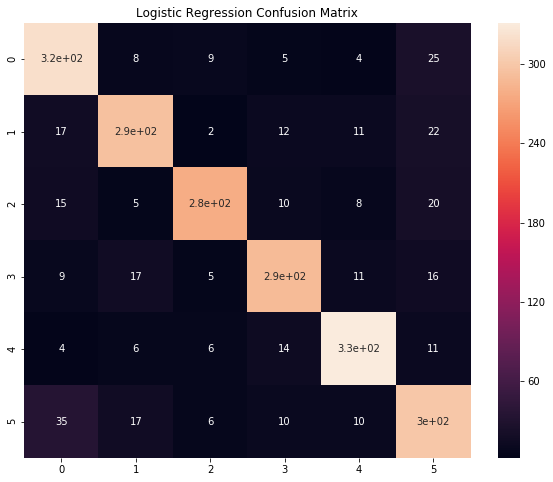

In [46]:
sns.heatmap(confusion_matrix(y_test,log_y),annot=True)
plt.title('Logistic Regression Confusion Matrix')
f = plt.gcf()
f.set_size_inches(10,8)

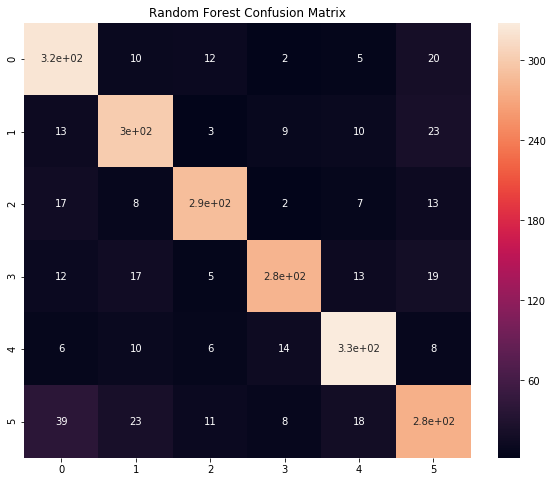

In [47]:
sns.heatmap(confusion_matrix(y_test,rand_y),annot=True)
plt.title('Random Forest Confusion Matrix')
f = plt.gcf()
f.set_size_inches(10,8)

In [48]:
print('Logistic Regression Classification report :')
print(classification_report(y_test,log_y))

Logistic Regression Classification report :
                        precision    recall  f1-score   support

         Art and Music       0.80      0.86      0.83       371
                  Food       0.85      0.82      0.83       358
               History       0.91      0.83      0.87       336
         Manufacturing       0.85      0.83      0.84       347
Science and Technology       0.88      0.89      0.89       372
          Travel Blogs       0.76      0.79      0.78       377

             micro avg       0.84      0.84      0.84      2161
             macro avg       0.84      0.84      0.84      2161
          weighted avg       0.84      0.84      0.84      2161



In [49]:
print('Random Forest Classification report :')
print(classification_report(y_test,rand_y))

Random Forest Classification report :
                        precision    recall  f1-score   support

         Art and Music       0.79      0.87      0.83       371
                  Food       0.82      0.84      0.83       358
               History       0.89      0.86      0.87       336
         Manufacturing       0.89      0.81      0.85       347
Science and Technology       0.86      0.88      0.87       372
          Travel Blogs       0.77      0.74      0.75       377

             micro avg       0.83      0.83      0.83      2161
             macro avg       0.83      0.83      0.83      2161
          weighted avg       0.83      0.83      0.83      2161



In [50]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [51]:
log_r = recall_score(y_test,log_y,average='micro')
log_p = precision_score(y_test,log_y,average='micro')
log_f1 = f1_score(y_test,log_y,average='micro')

In [52]:
rand_r = recall_score(y_test,rand_y,average='micro')
rand_p = precision_score(y_test,rand_y,average='micro')
rand_f1 = f1_score(y_test,rand_y,average='micro')

In [53]:
data = [[log_p,log_r,log_f1,'Logistic Regression'],[rand_p,rand_r,rand_f1,'Random Forest']]
df = pd.DataFrame(data,columns=['Precision','Recall','f1-score','Algorithm'])

In [54]:
df.head()

,Precision,Recall,f1-score,Algorithm
0,0.838038,0.838038,0.838038,Logistic Regression
1,0.832022,0.832022,0.832022,Random Forest


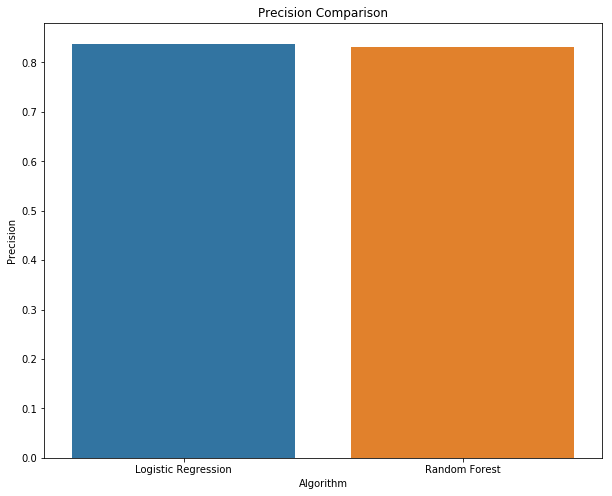

In [55]:
sns.barplot(y='Precision',x='Algorithm',data=df)
plt.title('Precision Comparison')
f = plt.gcf()
f.set_size_inches(10,8)

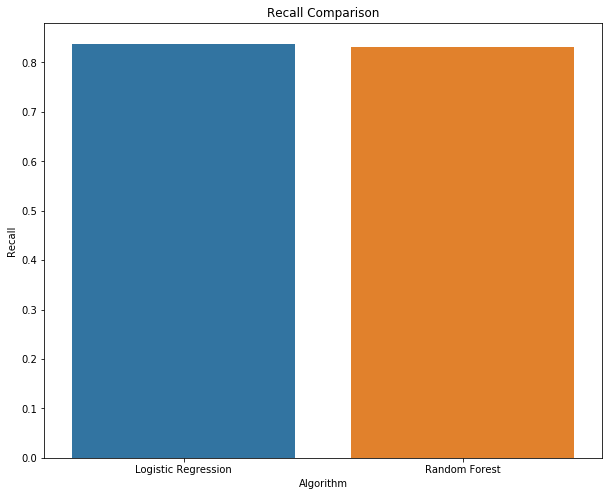

In [56]:
sns.barplot(y='Recall',x='Algorithm',data=df)
plt.title('Recall Comparison')
f = plt.gcf()
f.set_size_inches(10,8)

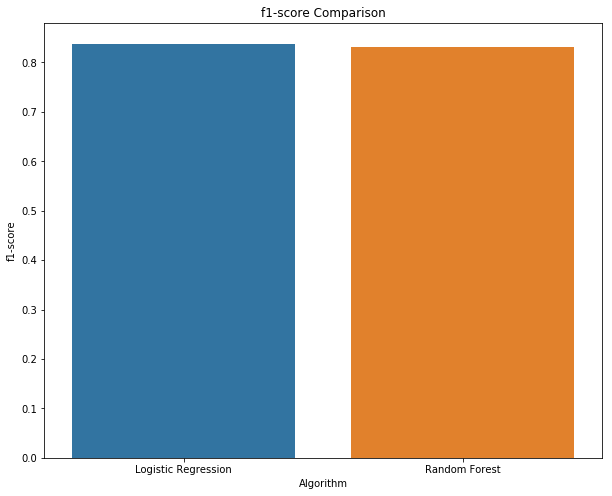

In [57]:
sns.barplot(y='f1-score',x='Algorithm',data=df)
plt.title('f1-score Comparison')
f = plt.gcf()
f.set_size_inches(10,8)